<a href="https://colab.research.google.com/github/Shahana-KK-123/Gender-prediction/blob/main/project_gender.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv("/content/gender_classification_v7.csv")
df.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


In [5]:
df.isna().sum()

long_hair                    0
forehead_width_cm            0
forehead_height_cm           0
nose_wide                    0
nose_long                    0
lips_thin                    0
distance_nose_to_lip_long    0
gender                       0
dtype: int64

In [6]:
df['gender'].value_counts()

Female    2501
Male      2500
Name: gender, dtype: int64

In [7]:
df.shape

(5001, 8)

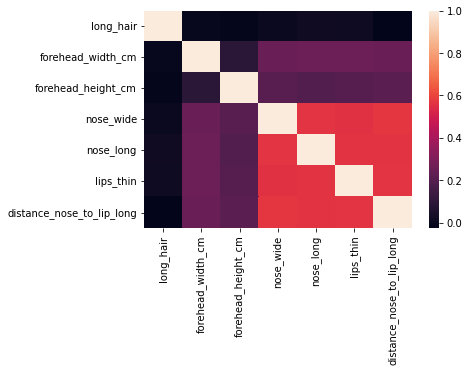

In [8]:
sns.heatmap(df.corr())

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


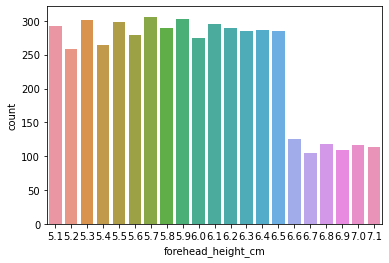

In [9]:
sns.countplot('forehead_height_cm',data=df)

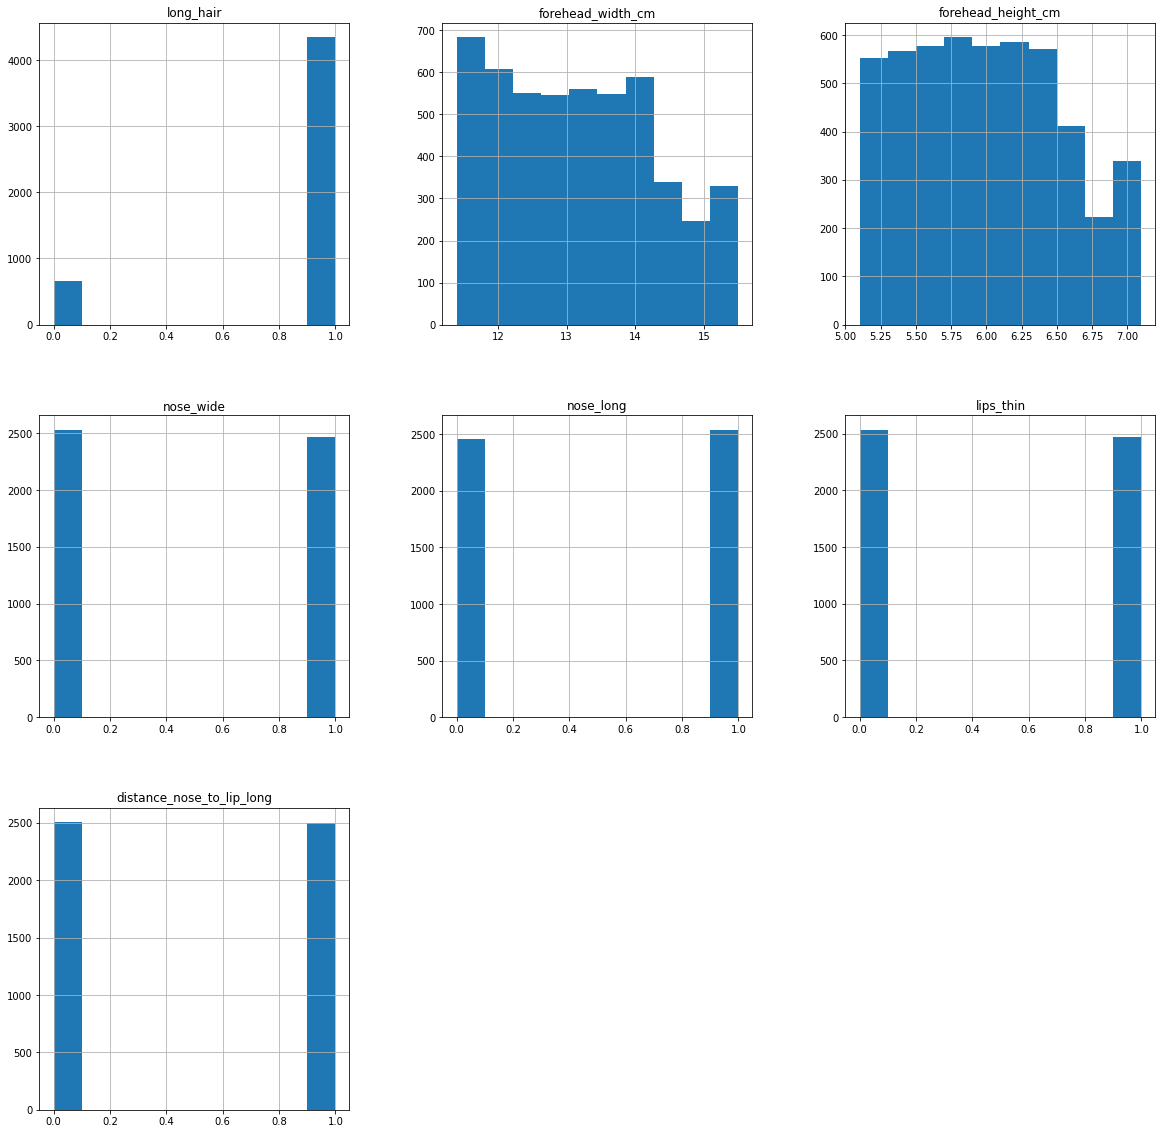

In [10]:
p = df.hist(figsize = (20,20))

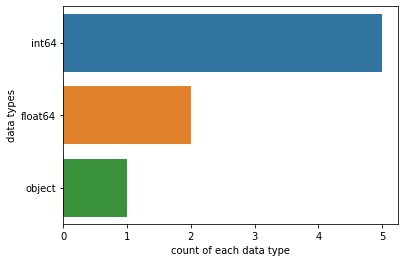

In [11]:
sns.countplot(y=df.dtypes ,data=df)
plt.xlabel("count of each data type")
plt.ylabel("data types")
plt.show()

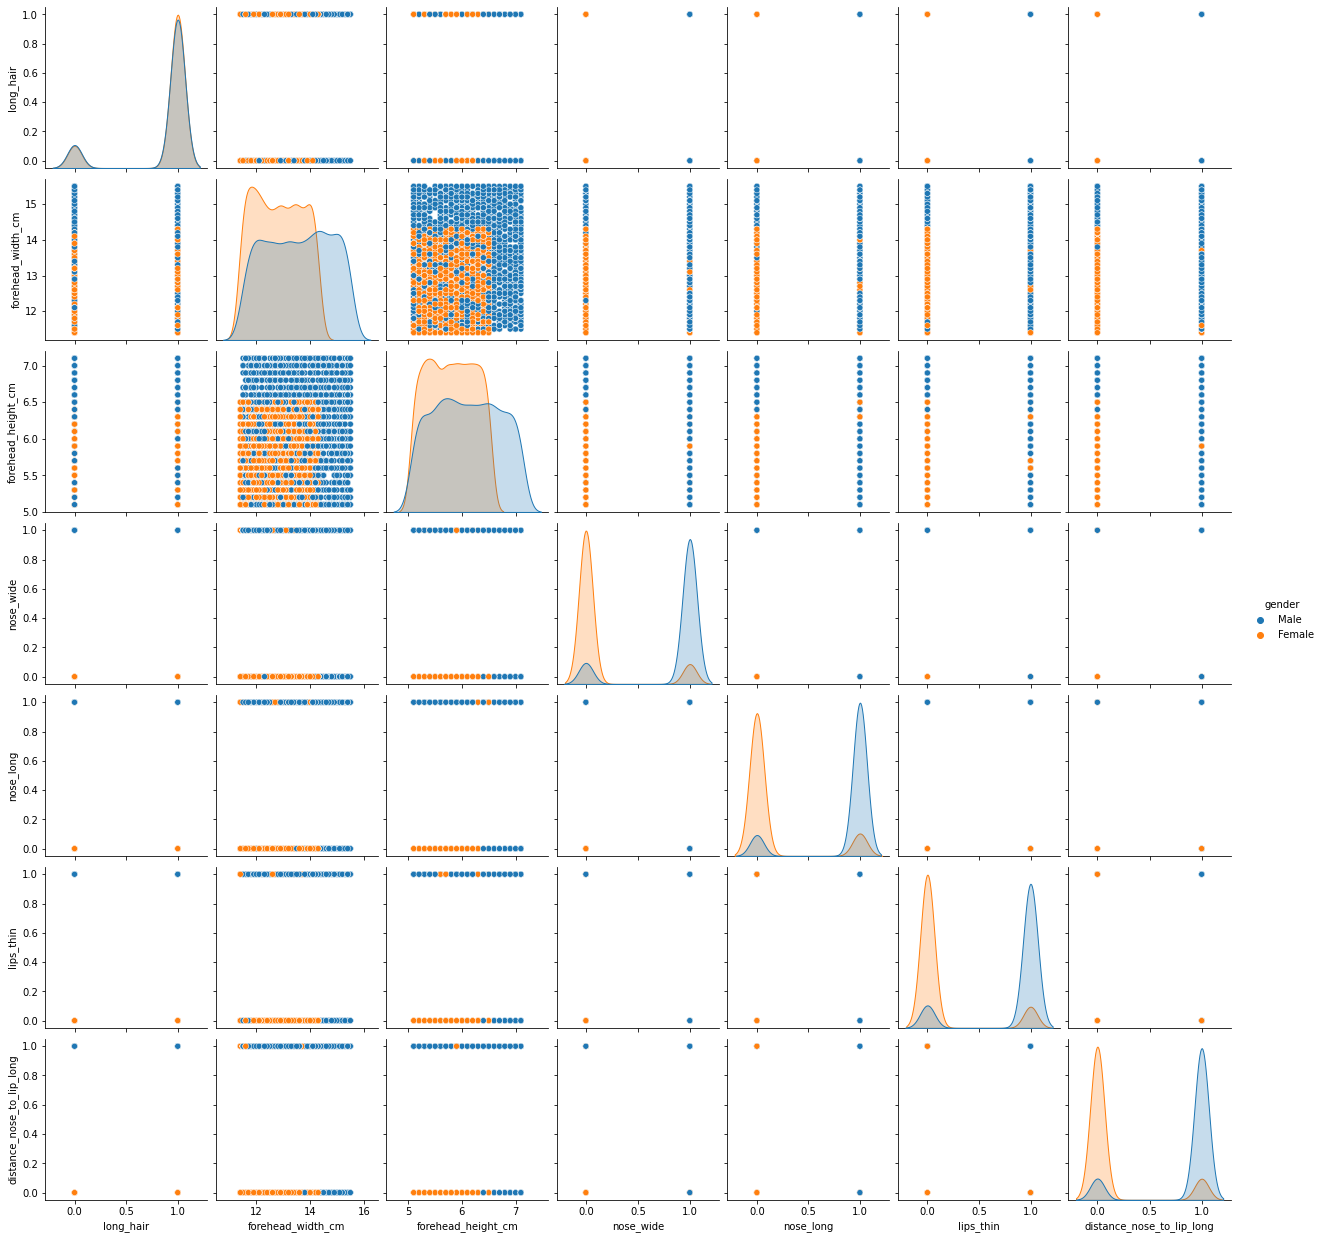

In [12]:
sns.pairplot(df,hue='gender')

In [13]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]
x.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
0,1,11.8,6.1,1,0,1,1
1,0,14.0,5.4,0,0,1,0
2,0,11.8,6.3,1,1,1,1
3,0,14.4,6.1,0,1,1,1
4,1,13.5,5.9,0,0,0,0


In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=1)
x_test

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
2764,1,12.8,6.3,0,0,1,0
4767,1,12.3,5.8,1,1,1,1
3814,1,11.5,5.4,0,0,0,0
3499,1,12.3,6.2,0,0,1,1
2735,1,12.2,5.6,0,0,0,0
...,...,...,...,...,...,...,...
3969,1,12.6,6.2,1,0,1,1
2535,1,14.3,5.6,1,1,1,1
1361,1,11.6,5.8,0,1,1,1
1458,1,13.3,5.4,0,0,1,0


In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)
x_test

array([[1.        , 0.34146341, 0.6       , ..., 0.        , 1.        ,
        0.        ],
       [1.        , 0.2195122 , 0.35      , ..., 1.        , 1.        ,
        1.        ],
       [1.        , 0.02439024, 0.15      , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [1.        , 0.04878049, 0.35      , ..., 1.        , 1.        ,
        1.        ],
       [1.        , 0.46341463, 0.15      , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.56097561, 0.        , ..., 1.        , 1.        ,
        1.        ]])

In [16]:
from sklearn.ensemble import RandomForestClassifier
scaler=RandomForestClassifier()
scaler.fit(x_train,y_train)
y_pred=scaler.predict(x_test)
y_pred

array(['Female', 'Male', 'Female', ..., 'Male', 'Female', 'Male'],
      dtype=object)

In [17]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
print(score)

0.9713524317121919


              precision    recall  f1-score   support

      Female       0.97      0.98      0.97       745
        Male       0.98      0.97      0.97       756

    accuracy                           0.97      1501
   macro avg       0.97      0.97      0.97      1501
weighted avg       0.97      0.97      0.97      1501



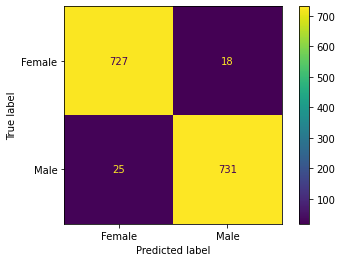

In [18]:
from sklearn.metrics import ConfusionMatrixDisplay,classification_report
print(classification_report(y_test,y_pred))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))
